# BOOM BIKES SHARING

## Data Reading and Understanding

In [114]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
# Importing day.csv
bikes = pd.read_csv("day.csv")

In [116]:
bikes.shape

(730, 16)

In [117]:
bikes.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [118]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Dropping the unwanted variables**
- `instant` is a unique variable
- `dteday` we have year and month so date not needed specifically
- `casual`  and `registered`can be dropped as these sum upto **count**
- `atemp` can be dropped as **temp** provides sufficient information

In [119]:
droppin_col = ['instant','dteday','atemp','casual','registered']
bikes.drop(droppin_col , axis = 1 , inplace=True)

In [120]:
bikes.shape

(730, 11)

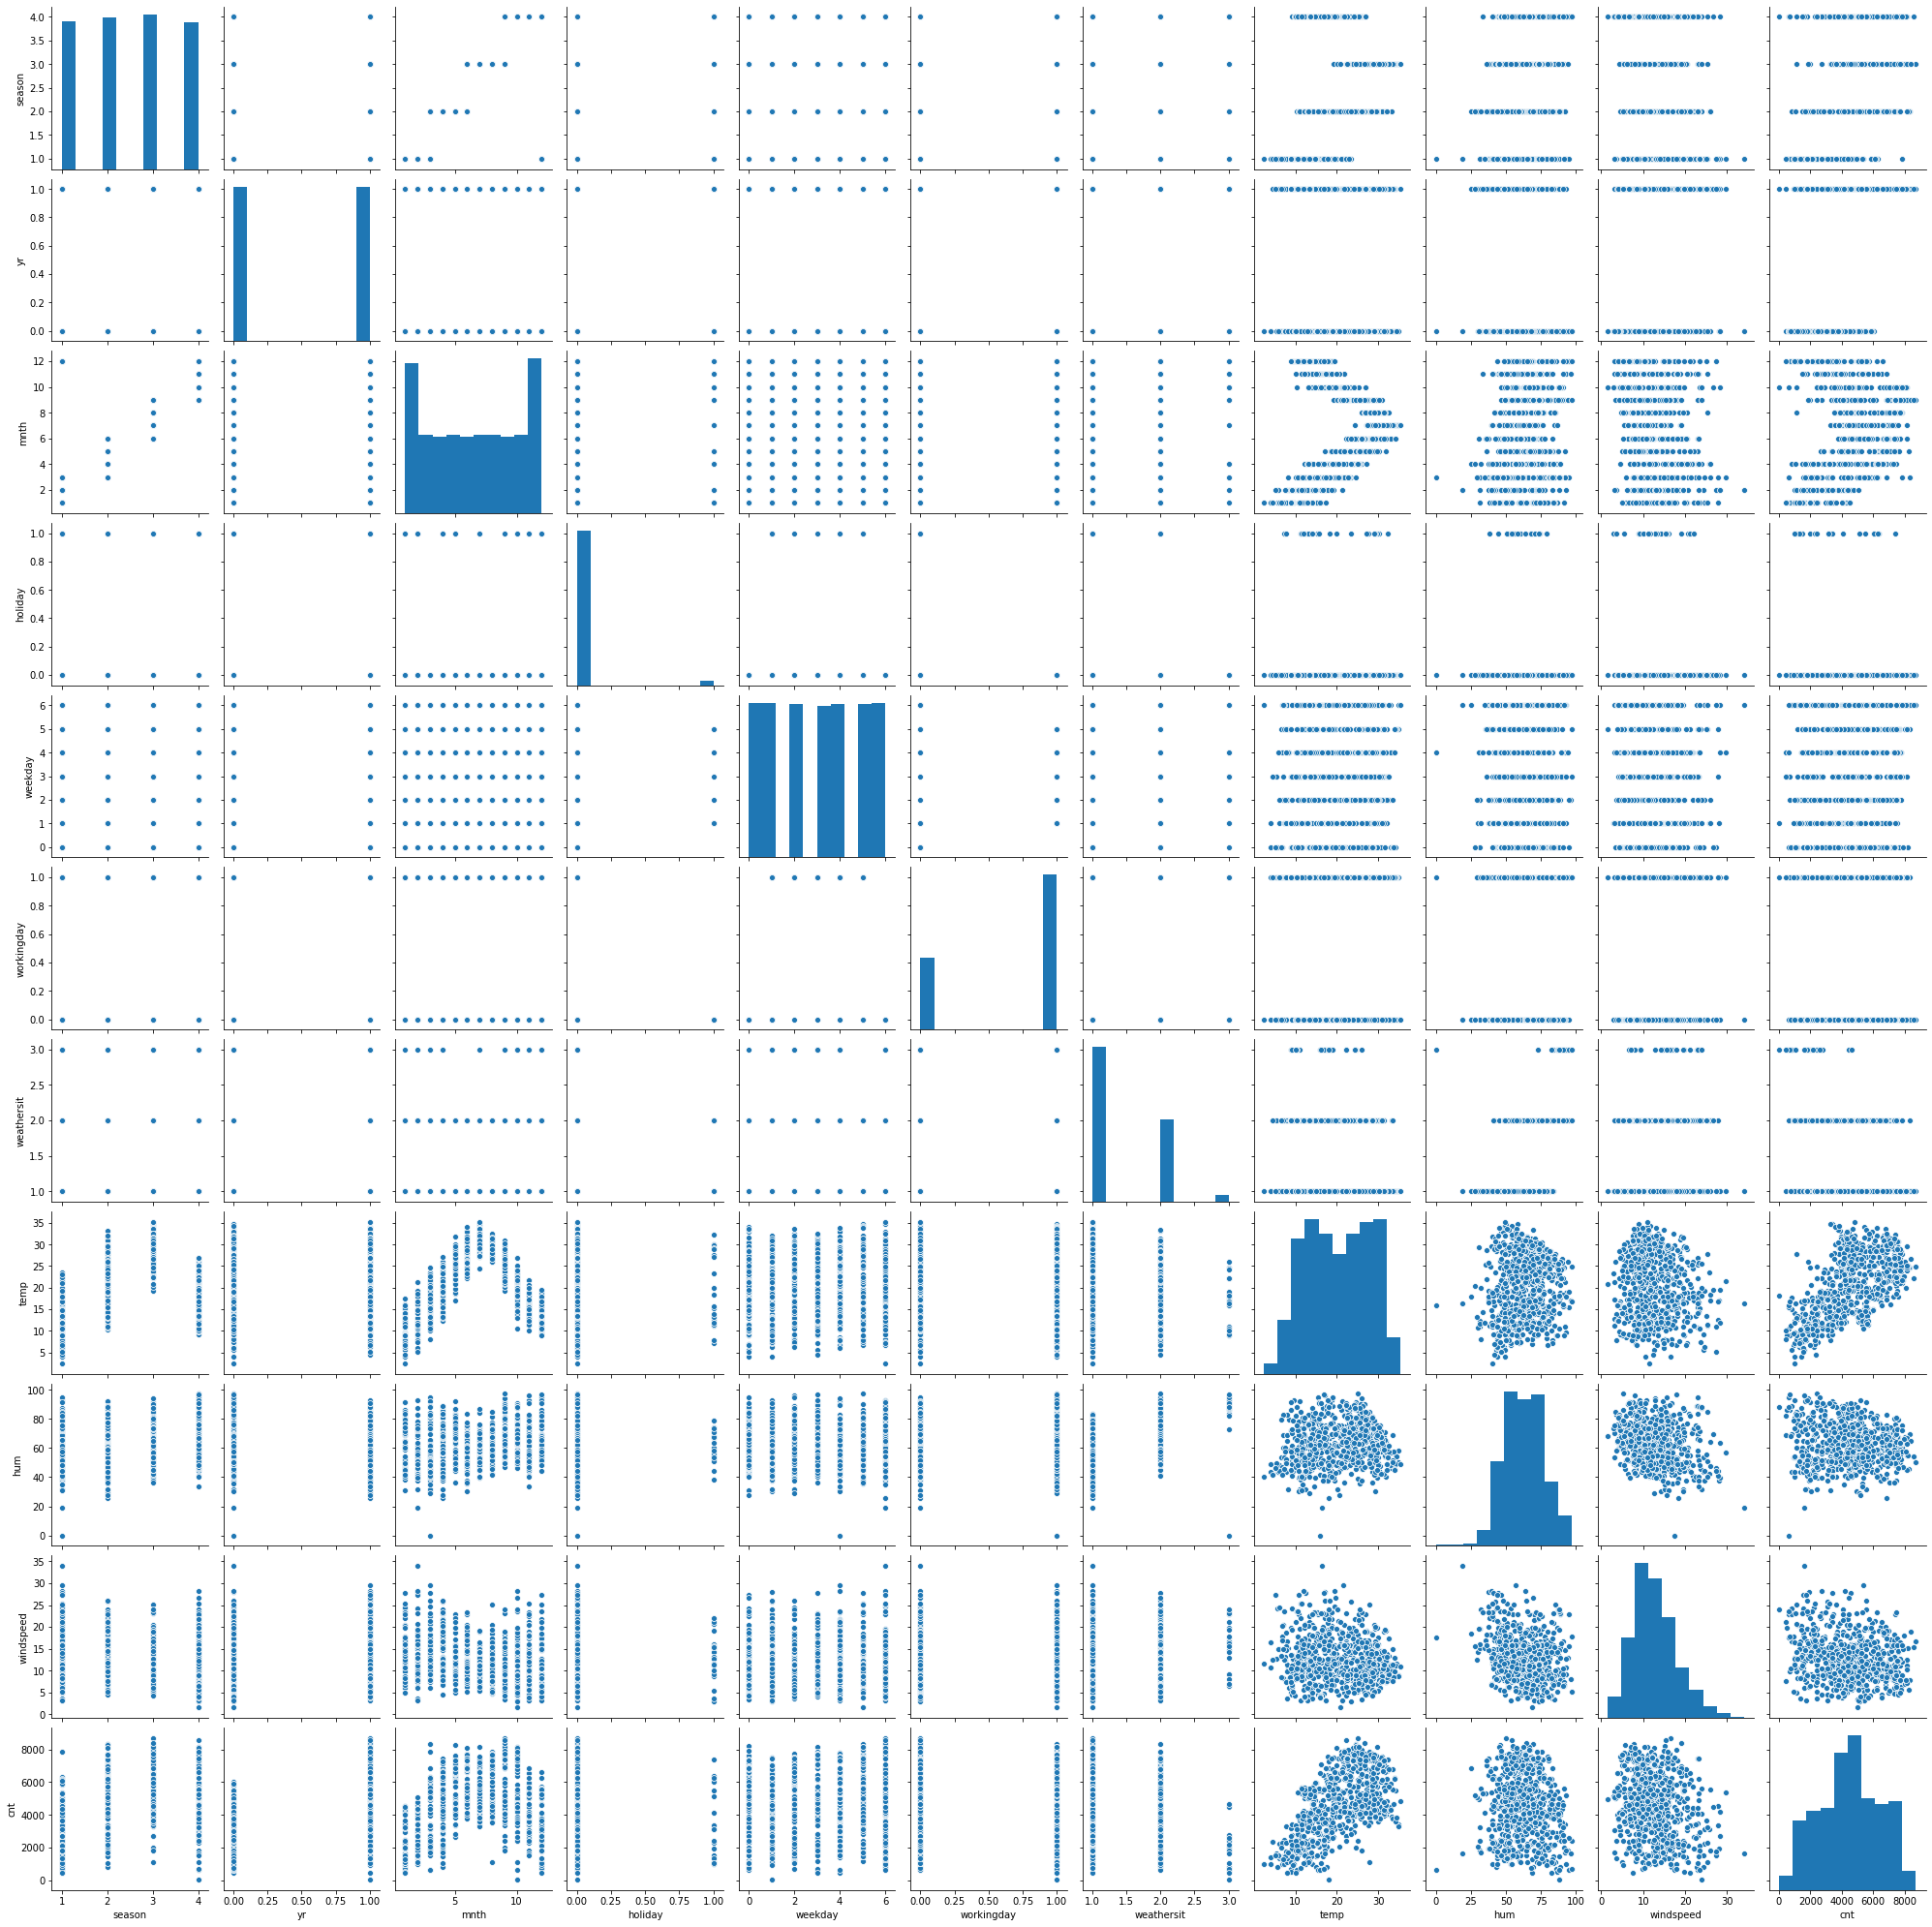

In [121]:
#Visulaisation for numeric variables
sns.pairplot(bikes)
plt.show()

- Judging from the pairplot there is no linear model possiblity
- Since also for now all the variables are numeric so , no categorical visulaisation possible as of now

## Preparing data for Modelling
- Encoding:
    - Converting categorical variables to dummy

### Mapping the numericals to the respective categories

In [122]:
season_encode = {1:'spring' ,2:'summer', 3:'fall', 4:'winter'}
month_encode = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
weekday_encode = {0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'}
weather_encode = {1:'clear', 2:'mist',3:'light snow',4:'heavy rain'}

In [123]:
bikes['season'] = bikes['season'].map(season_encode)
bikes['mnth'] = bikes['mnth'].map(month_encode)
bikes['weekday'] = bikes['weekday'].map(weekday_encode)
bikes['weathersit'] = bikes['weathersit'].map(weather_encode)

In [124]:
bikes.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sun,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,mon,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,tue,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,wed,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,thu,1,clear,9.305237,43.6957,12.522300,1600
5,spring,0,jan,0,fri,1,clear,8.378268,51.8261,6.000868,1606
6,spring,0,jan,0,sat,1,mist,8.057402,49.8696,11.304642,1510
7,spring,0,jan,0,sun,0,mist,6.765000,53.5833,17.875868,959
8,spring,0,jan,0,mon,0,clear,5.671653,43.4167,24.250650,822
9,spring,0,jan,0,tue,1,clear,6.184153,48.2917,14.958889,1321


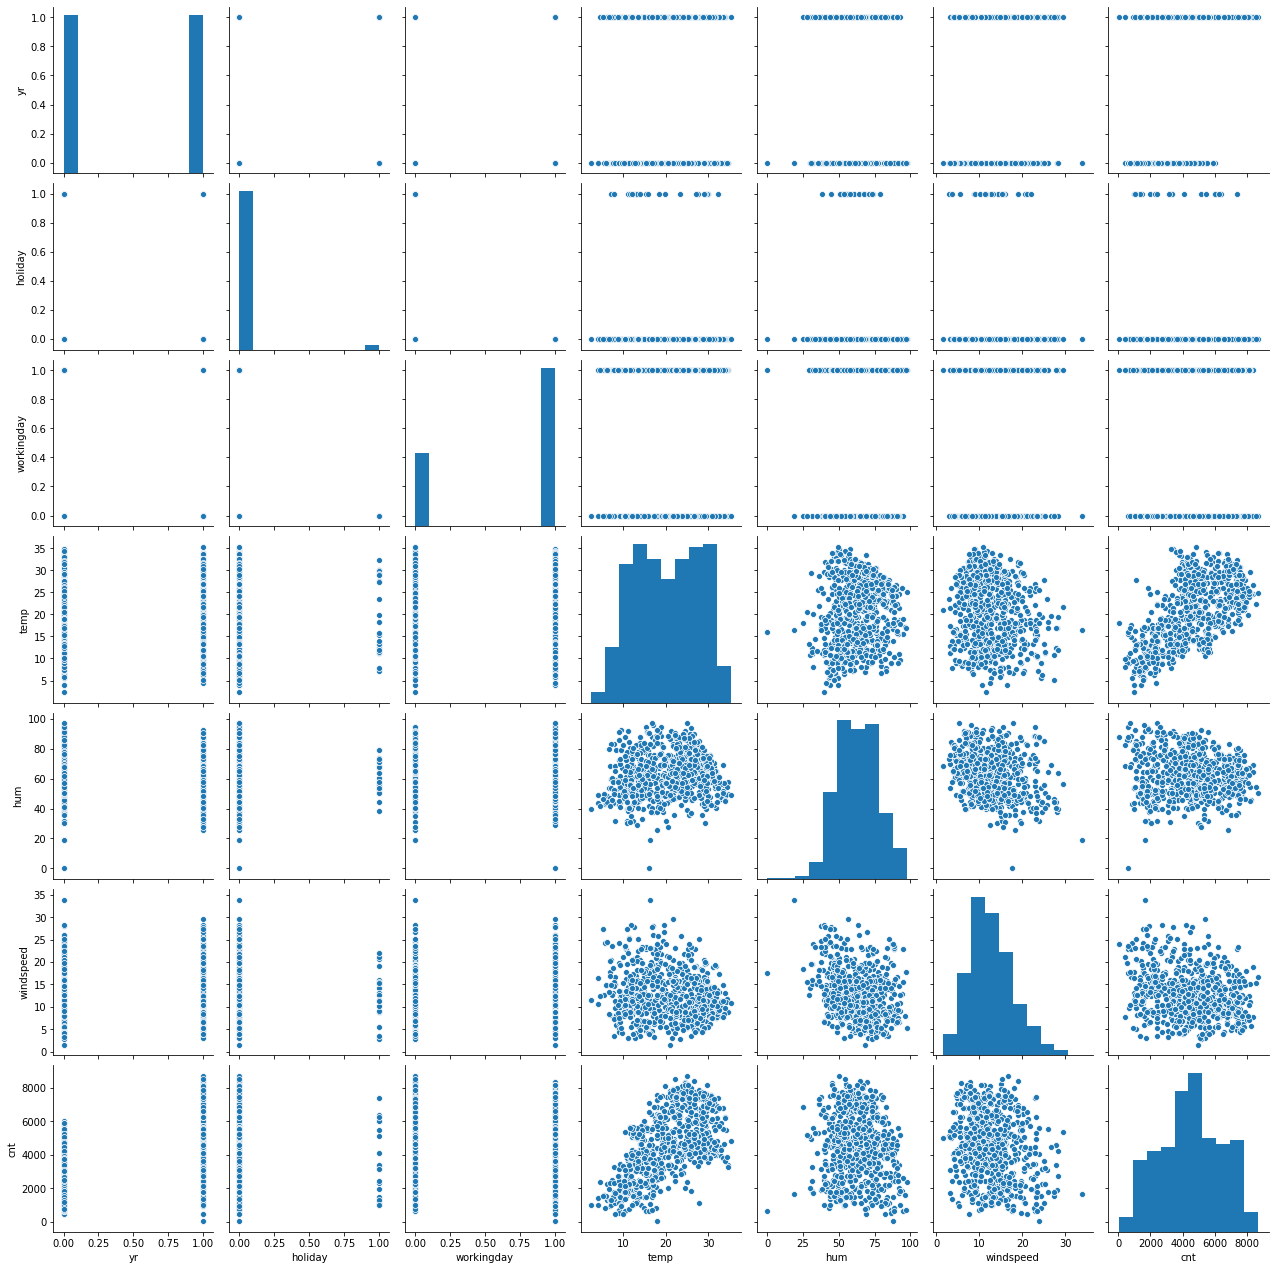

In [125]:
#Visulaisation after encoding
sns.pairplot(bikes)
plt.show()

### Dummy Variables

In [62]:
season_dummy = pd.get_dummies(bikes['season'],drop_first=True)
season_dummy.head(10)

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [63]:
mnth_dummy = pd.get_dummies(bikes['mnth'],drop_first=True)
weekday_dummy = pd.get_dummies(bikes['weekday'],drop_first=True)
weathersit_dummy = pd.get_dummies(bikes['weathersit'],drop_first=True)

In [64]:
bikes = pd.concat([bikes,season_dummy,mnth_dummy,weekday_dummy,weathersit_dummy] , axis=1)

In [65]:
bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow,mist
0,spring,0,jan,0,sun,0,mist,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,1
1,spring,0,jan,0,mon,0,mist,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,1
2,spring,0,jan,0,tue,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,1,0,0,0
3,spring,0,jan,0,wed,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,thu,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,1,0,0,0,0
5,spring,0,jan,0,fri,1,clear,8.378268,51.8261,6.000868,...,0,0,0,0,0,0,0,0,0,0
6,spring,0,jan,0,sat,1,mist,8.057402,49.8696,11.304642,...,0,0,0,1,0,0,0,0,0,1
7,spring,0,jan,0,sun,0,mist,6.765000,53.5833,17.875868,...,0,0,0,0,1,0,0,0,0,1
8,spring,0,jan,0,mon,0,clear,5.671653,43.4167,24.250650,...,0,0,1,0,0,0,0,0,0,0
9,spring,0,jan,0,tue,1,clear,6.184153,48.2917,14.958889,...,0,0,0,0,0,0,1,0,0,0


In [66]:
catvar_drop = ['season','mnth','weekday','weathersit']
bikes.drop(catvar_drop , axis = 1 ,inplace = True)

In [67]:
bikes.shape

(730, 29)

### Split the data to train and test

In [68]:
import sklearn
from sklearn.model_selection import train_test_split
df_train , df_test = train_test_split(bikes, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features 
- MinMax Scaling is used

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_var = ['temp','hum','windspeed','cnt']
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [70]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow,mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [71]:
df_train[num_var].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [72]:
y_train = df_train.pop('cnt')
X_train = df_train

## Model Building 

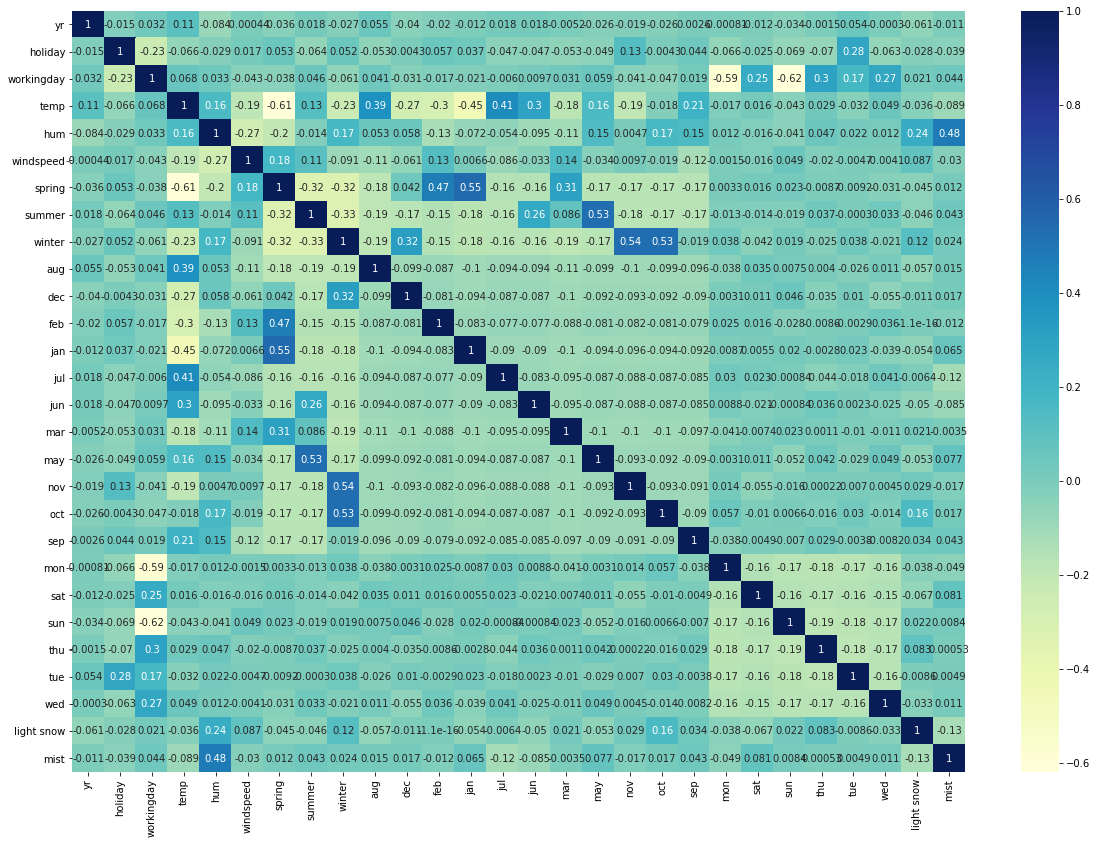

In [73]:
#Heatmap 
plt.figure(figsize = (20 , 14))
sns.heatmap(df_train.corr() , annot=True , cmap='YlGnBu')
plt.show()

### RFE
Recursive feature elimination

In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [75]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [76]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 10),
 ('winter', False, 5),
 ('aug', False, 14),
 ('dec', False, 8),
 ('feb', False, 9),
 ('jan', False, 6),
 ('jul', False, 2),
 ('jun', False, 17),
 ('mar', False, 19),
 ('may', False, 11),
 ('nov', False, 7),
 ('oct', False, 15),
 ('sep', False, 4),
 ('mon', True, 1),
 ('sat', False, 16),
 ('sun', True, 1),
 ('thu', False, 18),
 ('tue', False, 12),
 ('wed', False, 13),
 ('light snow', True, 1),
 ('mist', False, 3)]

In [77]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'mon', 'sun', 'light snow'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [79]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [80]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     239.2
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          7.11e-175
Time:                        02:35:34   Log-Likelihood:                 464.41
No. Observations:                 510   AIC:                            -908.8
Df Residuals:                     500   BIC:                            -866.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3293      0.024     13.474      0.0

- `holiday` can be dropped , since it is insignificant as p > 0.05

In [81]:
X_train1 =  X_train_rfe.drop(['holiday','const'], axis=1)

In [82]:
# Build a newmodel1 
X_train1 = sm.add_constant(X_train1)

In [85]:
lm1 = sm.OLS(y_train,X_train1).fit()   # Running the linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     239.2
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          7.11e-175
Time:                        02:44:03   Log-Likelihood:                 464.41
No. Observations:                 510   AIC:                            -908.8
Df Residuals:                     500   BIC:                            -866.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3603      0.040      9.043      0.0

- `mon` can be dropped , since it is insignificant as p > 0.05

In [87]:
X_train2 =  X_train1.drop(['mon','const'], axis=1)

In [89]:
# Build a newmodel2
X_train2 = sm.add_constant(X_train2)

lm2 = sm.OLS(y_train,X_train2).fit()   # Running the linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     268.4
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          1.02e-175
Time:                        02:47:27   Log-Likelihood:                 463.50
No. Observations:                 510   AIC:                            -909.0
Df Residuals:                     501   BIC:                            -870.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3928      0.032     12.467      0.0

In [92]:
X_train_new = X_train2.drop(['const'], axis=1)

In [93]:
# Calculate the VIFs for the newmodel2
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.95
2,temp,8.76
1,workingday,4.61
4,windspeed,3.98
0,yr,2.03
5,spring,1.82
6,sun,1.80
7,light snow,1.10


- `hum` can be dropped , since it VIF > 5

In [94]:
X_train2.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'sun', 'light snow'],
      dtype='object')

In [95]:
X_train3 = X_train2.drop(['const','hum'], axis=1)

In [96]:
# Build a newmodel3
X_train3 = sm.add_constant(X_train3)

lm3 = sm.OLS(y_train,X_train3).fit()   # Running the linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     277.9
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          3.68e-168
Time:                        03:10:36   Log-Likelihood:                 442.83
No. Observations:                 510   AIC:                            -869.7
Df Residuals:                     502   BIC:                            -835.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2385      0.022     11.053      0.0

In [97]:
X_train_new = X_train3.drop(['const'], axis=1)

In [98]:
# Calculate the VIFs for the newmodel3

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
1,workingday,4.11
3,windspeed,3.87
0,yr,2.03
5,sun,1.70
4,spring,1.62
6,light snow,1.05


- `temp` can be dropped its VIF > 5

In [99]:
X_train4 = X_train3.drop(['const','temp'], axis=1)

In [100]:
# Build a newmodel4
X_train4 = sm.add_constant(X_train4)

lm4 = sm.OLS(y_train,X_train4).fit()   # Running the linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     198.5
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          3.67e-129
Time:                        03:13:43   Log-Likelihood:                 348.56
No. Observations:                 510   AIC:                            -683.1
Df Residuals:                     503   BIC:                            -653.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4738      0.018     26.633      0.0

In [101]:
X_train_new = X_train4.drop(['const'], axis=1)

In [102]:
# Calculate the VIFs for the newmodel4

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.32
1,workingday,2.74
0,yr,1.85
4,sun,1.43
3,spring,1.36
5,light snow,1.05


### All the variables have p value < 0.05 and VIF < 5

## Residual Analysis of train data

In [103]:
y_train_pred = lm4.predict(X_train4)

Text(0.5, 0, 'Errors')

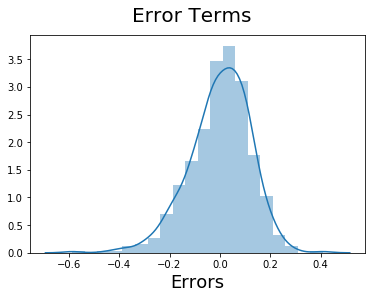

In [104]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred) , bins = 20)
fig.suptitle('Error Terms' , fontsize = 20)
plt.xlabel('Errors',fontsize = 18)

- **Residual errors are normally distributed**

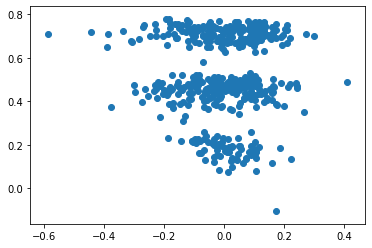

In [128]:
res_value = y_train - y_train_pred
plt.scatter(res_value , y_train_pred)
plt.show()

- **There is no clear patttern in the dustribution, so it satifies homoscedasticity**

## Making Predictions on the test

In [105]:
num_var = ['temp','hum','windspeed','cnt']
df_test[num_var] = scaler.fit_transform(df_test[num_var])

### Dividing into X and Y sets for the model building

In [106]:
y_test = df_test.pop('cnt')
X_test = df_test

In [107]:
X_train_new.columns

Index(['yr', 'workingday', 'windspeed', 'spring', 'sun', 'light snow'], dtype='object')

In [108]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [109]:
#Making Predictions
y_test_pred = lm4.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_test_pred')

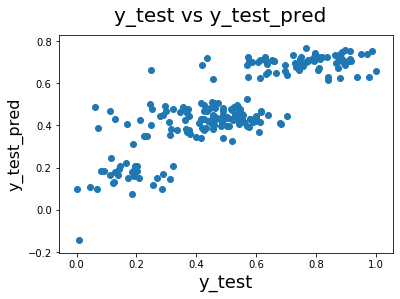

In [112]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)   # Plot heading 
plt.xlabel('y_test', fontsize=18)                    # X-label
plt.ylabel('y_test_pred', fontsize=16)               # Y-label

In [113]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.6754182223995612

**The predictors that seems to be beneficial and loss to bike shae count are:**
-  light snow    -0.2753 
-  spring        -0.2666
-  yr             0.2511
-  windspeed     -0.1886
-  sun            0.0592
-  workingday     0.0538

## THANK YOU